In [ ]:
import pandas as pd

# Load the dataset (Assuming it's in CSV format)
df = pd.read_csv('/content/drive/MyDrive/gene_expression_data.xls')

# Split into two DataFrames (first 16000 columns and remaining columns)
df1 = df.iloc[:, :16000]  # First 16000 columns
df2 = df.iloc[:, 16000:]  # Remaining columns

# Save to Excel in different sheets
with pd.ExcelWriter('split_data.xlsx') as writer:
    df1.to_excel(writer, sheet_name='Sheet1', index=False)
    df2.to_excel(writer, sheet_name='Sheet2', index=False)


In [ ]:
# Read the split sheets back
df1 = pd.read_excel('split_data.xlsx', sheet_name='Sheet1')
df2 = pd.read_excel('split_data.xlsx', sheet_name='Sheet2')

# Merge both DataFrames
merged_df = pd.concat([df1, df2], axis=1)

# Save the merged dataset
merged_df.to_csv('merged_dataset.csv', index=False)


In [ ]:
import pandas as pd

# Example: Assuming df is your DataFrame
df = pd.read_csv('/content/merged_dataset.csv')

# Print the shape of the DataFrame
print("Rows and Columns:", df.shape)


Rows and Columns: (801, 20532)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
 #Preprocess Data: Select Only Numeric Columns
df = merged_df.select_dtypes(include=[np.number])  # Remove non-numeric data
# Handle missing values
df.fillna(df.mean(), inplace=True)

# Standardize the dataset for better clustering
scaler = StandardScaler()
X = scaler.fit_transform(df)  # Convert to NumPy array

In [ ]:
# 📌 3️⃣ Find Optimal k using Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Test for k = 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)

    inertia.append(kmeans.inertia_)  # Sum of squared distances to cluster centers
    silhouette_scores.append(silhouette_score(X, labels))  # Quality of clustering

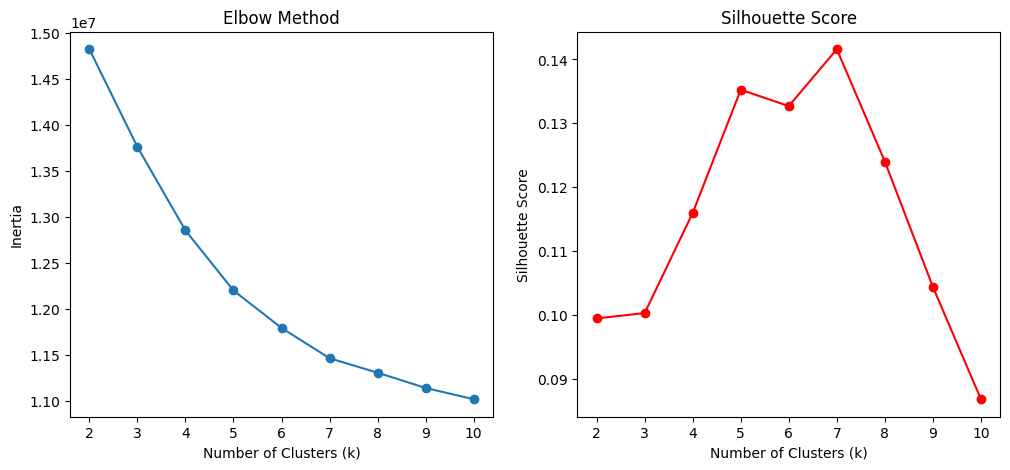

In [ ]:
# 📌 4️⃣ Plot Elbow Method & Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")

plt.show()

In [ ]:
# 📌 5️⃣ Choose the Best k (Manual or Automatic)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal k estimated: {optimal_k}")

Optimal k estimated: 7


In [ ]:
# 📌 6️⃣ Apply K-Means Clustering
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = final_kmeans.fit_predict(X)  # Assign clusters to original DataFrame
print("Rows and Columns:", df.shape)

Rows and Columns: (801, 20532)


In [ ]:
# 📌 7️⃣ Save Clustered Data
df.to_csv("clustered_data.csv", index=False)
print("Clustering complete! Results saved as clustered_data.csv")

Clustering complete! Results saved as clustered_data.csv


In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

In [ ]:
# 📌 3️⃣ Reduce Dimensions Using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(df)



In [ ]:
# 📌 4️⃣ Convert to DataFrame for Plotting
df_tsne = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
df_tsne["Cluster"] = df["Cluster"]



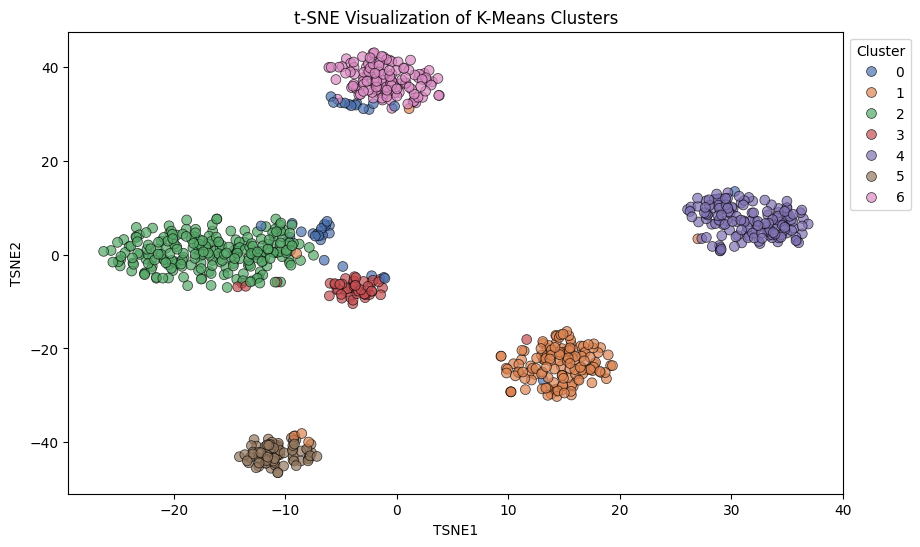

In [ ]:
# 📌 5️⃣ Visualize Clusters with t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", palette="deep", data=df_tsne, s=50, alpha=0.7, edgecolors="k")
plt.title("t-SNE Visualization of K-Means Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# 📌 3️⃣ Save Each Cluster to a Separate csv File
for cluster_num in range(optimal_k):
    cluster_data = df[df["Cluster"] == cluster_num]  # Filter by cluster
    file_name = f"Cluster_{cluster_num}.csv"  # Create a unique file name
    cluster_data.to_csv(file_name, index=False)
    print(f"Saved: {file_name}")

print("✅ All clusters saved successfully!")

Saved: Cluster_0.csv
Saved: Cluster_1.csv
Saved: Cluster_2.csv
Saved: Cluster_3.csv
Saved: Cluster_4.csv
Saved: Cluster_5.csv
Saved: Cluster_6.csv
✅ All clusters saved successfully!


In [ ]:
# 📌 4️⃣ Apply K-Means with k=5
k = 5  # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)  # Assign clusters



In [ ]:
# 📌 6️⃣ Save Clustered Data
df.to_csv("clustered_data_k5.csv", index=False)
print("Clustering complete! Results saved as clustered_data_k5.csv")

Clustering complete! Results saved as clustered_data_k5.csv


In [ ]:
# 📌 3️⃣ Reduce Dimensions Using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(df)

In [ ]:
# 📌 4️⃣ Convert to DataFrame for Plotting
df_tsne = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
df_tsne["Cluster"] = df["Cluster"]

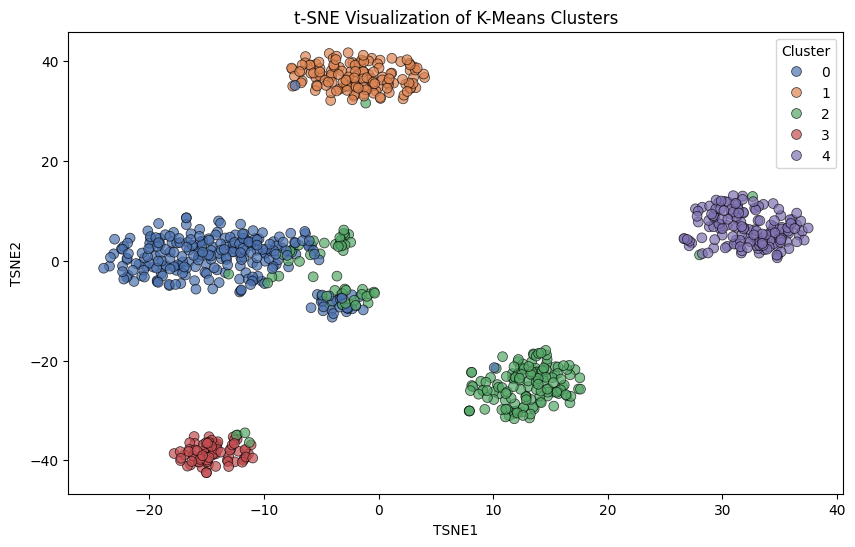

In [ ]:
# 📌 5️⃣ Visualize Clusters with t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Cluster", palette="deep", data=df_tsne, s=50, alpha=0.7, edgecolors="k")
plt.title("t-SNE Visualization of K-Means Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# 📌 3️⃣ Save Each Cluster to a Separate csv File
for cluster_num in range(5):
    cluster_data = df[df["Cluster"] == cluster_num]  # Filter by cluster
    file_name = f"Cluster_{cluster_num}.csv"  # Create a unique file name
    cluster_data.to_csv(file_name, index=False)
    print(f"Saved: {file_name}")

print("✅ All clusters saved successfully!")

Saved: Cluster_0.csv
Saved: Cluster_1.csv
Saved: Cluster_2.csv
Saved: Cluster_3.csv
Saved: Cluster_4.csv
✅ All clusters saved successfully!


In [15]:
import pandas as pd

# 📌 Load the Excel File & Specific Sheet
file_path = "/split_data (1).xlsx"  # Update with actual file name
sheet_name="sheet3"
df = pd.read_excel(file_path, sheet_name="Sheet3")  # Change "Sheet1" as needed

# 📌 Select the Column to Save (e.g., "Gene_Name")
column_name = "Class"  # Change this to the actual column name
df_selected = df[[column_name]]  # Keep only the selected column

# 📌 Save to a New Excel File
df_selected.to_csv("class_file.xlsx", index=False)  # Saves without index

print(f"✅ Column '{column_name}' saved successfully to 'output_column.xlsx'!")


FileNotFoundError: [Errno 2] No such file or directory: '/split_data (1).xlsx'

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive


In [8]:
# Step 1: Mount Google Drive

drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
file_path = "/content/drive/MyDrive/gene_expression_data.xls"

In [ ]:
# Read first sheet (16,000 features)
df1 = pd.read_excel('/content/drive/MyDrive/project_data/split_data (1).xlsx', sheet_name=1)



In [ ]:
# Read second sheet (4,000 features + class labels)
df2 = pd.read_excel('/content/drive/MyDrive/project_data/split_data (1).xlsx', sheet_name=2)



In [ ]:
# Extract class labels from the last column of second sheet
y = df2.iloc[:, -1].values  # Assuming last column contains class labels



In [ ]:
# Remove class labels column from df2 (keeping only features)
df2 = df2.iloc[:, :-1]



In [5]:
# Merge both feature sets
X= pd.concat([df1, df2], axis=1).values  # Convert to NumPy array


NameError: name 'df1' is not defined

In [ ]:
# Step 3: Encode Class Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert to numerical labels (0 to 4)
y_categorical = to_categorical(y_encoded)  # Convert to one-hot encoding



In [6]:
# Step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


NameError: name 'X' is not defined

In [ ]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)
print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")

Training Samples: 640, Testing Samples: 161


In [ ]:
# Step 6: Build the Sequential Model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # Output layer (5 classes)
])

# Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Summary of Model
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │       2,320,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,485,765 (9.48 MB)

 Trainable params: 2,485,765 (9.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 7: Train the Model with Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8072 - loss: 0.4955 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9955 - loss: 0.0269 - val_accuracy: 0.9938 - val_loss: 0.0065
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9994 - loss: 0.0010 - val_accuracy: 0.9938 - val_loss: 0.0329
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9978 - loss: 0.0242 - val_accuracy: 0.9938 - val_loss: 0.0186
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9848 - loss: 0.1302 - val_accuracy: 0.9876 - val_loss: 0.1478
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9921 - loss: 0.0461 - val_accuracy: 0.9938 - val_loss: 0.1299


In [ ]:
# Step 8: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict Classes
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Compute Specificity (True Negative Rate) for Each Class
cm = confusion_matrix(y_true_classes, y_pred_classes)
specificity = []
for i in range(len(cm)):
    tn = np.sum(cm) - (np.sum(cm[i, :]) + np.sum(cm[:, i]) - cm[i, i])  # True Negatives
    fp = np.sum(cm[:, i]) - cm[i, i]  # False Positives
    specificity.append(tn / (tn + fp))

# Print Evaluation Metrics-
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity per Class: {np.round(specificity, 4)}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0013
Test Accuracy: 1.0000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step

Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Specificity per Class: [1. 1. 1. 1. 1.]


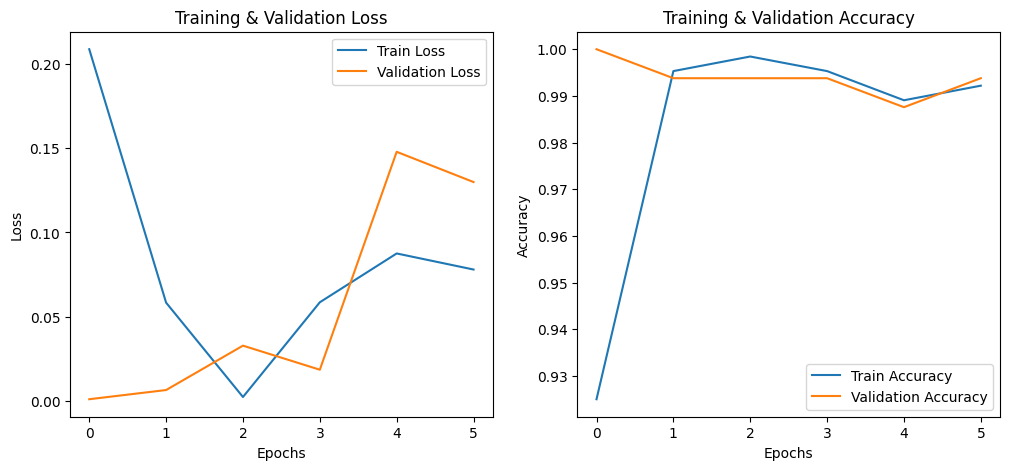

In [ ]:
# Step 9: Plot Training Loss & Accuracy Curves
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

plt.show()


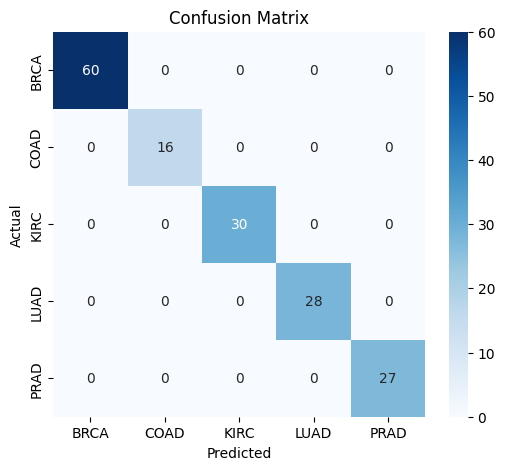

In [ ]:
# Step 10: Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **k-means clustering with k=5**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
from sklearn.decomposition import PCA
from google.colab import drive


In [ ]:
# Step 1: Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 2: Load the Excel File from Google Drive
file_path = "/content/drive/MyDrive/gene_expression_data.xls"  # Update with actual path

# Read first sheet (16,000 features)
df1 = pd.read_excel('/content/drive/MyDrive/project_data/split_data (1).xlsx', sheet_name=1)

# Read second sheet (4,000 features + class labels)
df2 = pd.read_excel('/content/drive/MyDrive/project_data/split_data (1).xlsx', sheet_name=2)

# Extract class labels from the last column of second sheet
y = df2.iloc[:, -1].values  # Assuming last column contains class labels

# Remove class labels column from df2 (keeping only features)
df2 = df2.iloc[:, :-1]

# Merge both feature sets
X = pd.concat([df1, df2], axis=1).values  # Convert to NumPy array


In [ ]:
# Step 3: Encode Class Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert class labels to numbers (0 to 4)

In [ ]:
# Step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 5: Apply K-Means Clustering (K=5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

In [ ]:
# Step 6: Evaluate Clustering Performance
accuracy = accuracy_score(y_encoded, cluster_labels)
ari = adjusted_rand_score(y_encoded, cluster_labels)
nmi = normalized_mutual_info_score(y_encoded, cluster_labels)

# Compute Confusion Matrix
cm = confusion_matrix(y_encoded, cluster_labels)

# Print Evaluation Metrics
print("\nClustering Evaluation Metrics:")
print(f"Accuracy (Based on direct match): {accuracy:.4f}")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")


Clustering Evaluation Metrics:
Accuracy (Based on direct match): 0.3471
Adjusted Rand Index (ARI): 0.7706
Normalized Mutual Information (NMI): 0.8427


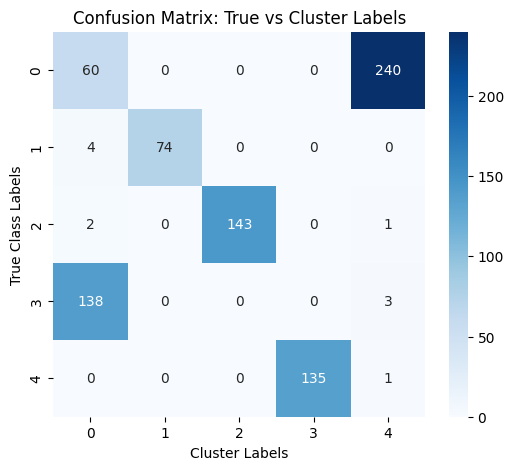

In [ ]:
# Step 7: Visualize Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Cluster Labels")
plt.ylabel("True Class Labels")
plt.title("Confusion Matrix: True vs Cluster Labels")
plt.show()


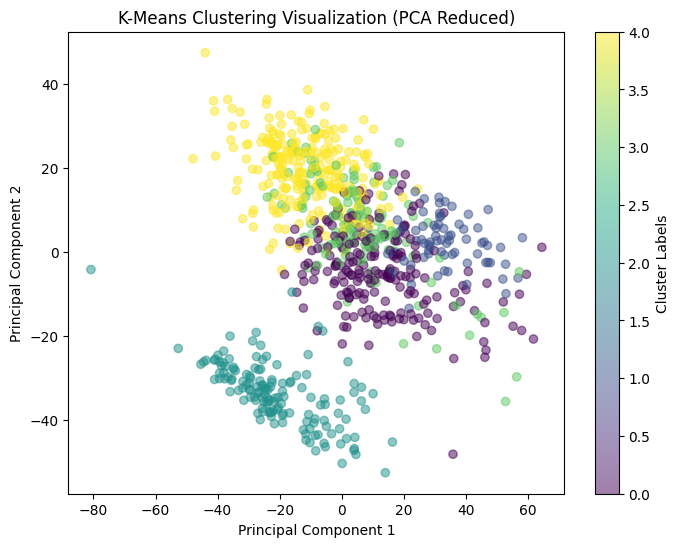

In [ ]:
# Step 8: Reduce Dimensions to 2D for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter Plot of Clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label="Cluster Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.show()

# K-Means clustering with best value of **K**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
from sklearn.decomposition import PCA
from google.colab import drive


In [ ]:
# Step 1: Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 2: Load the Excel File from Google Drive
file_path = "/content/drive/MyDrive/gene_expression_data.xls"  # Update with actual path

# Read first sheet (16,000 features)
df1 = pd.read_excel('/content/drive/MyDrive/project_data/split_data (1).xlsx', sheet_name=1)

# Read second sheet (4,000 features + class labels)
df2 = pd.read_excel('/content/drive/MyDrive/project_data/split_data (1).xlsx', sheet_name=2)

# Extract class labels from the last column of second sheet
y = df2.iloc[:, -1].values  # Assuming last column contains class labels

# Remove class labels column from df2 (keeping only features)
df2 = df2.iloc[:, :-1]

# Merge both feature sets
X = pd.concat([df1, df2], axis=1).values  # Convert to NumPy array



In [ ]:
# Step 3: Encode Class Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert class labels to numbers (0 to 4)


In [ ]:
# Step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


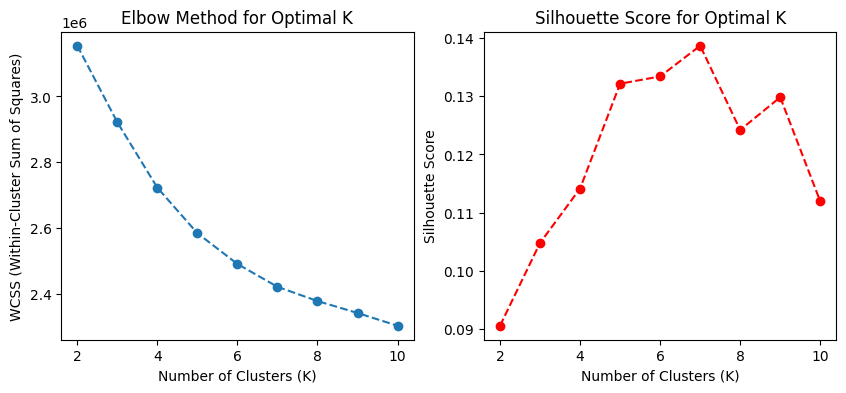

In [ ]:

# Step 5: Find Optimum Number of Clusters (K) using Elbow Method
wcss = []
silhouette_scores = []
K_range = range(2, 11)  # Testing for K=2 to K=10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Compute WCSS
    wcss.append(kmeans.inertia_)

    # Compute Silhouette Score
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Plot Elbow Method Graph
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")

# Plot Silhouette Score Graph
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()


In [ ]:
# Step 6: Select Optimal K (Choose the K with the 'elbow' and highest silhouette score)
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal Number of Clusters (K) chosen: {optimal_k}")



Optimal Number of Clusters (K) chosen: 7


In [ ]:
# Step 7: Apply K-Means with Optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

In [ ]:
# Step 8: Evaluate Clustering Performance
ari = adjusted_rand_score(y_encoded, cluster_labels)
nmi = normalized_mutual_info_score(y_encoded, cluster_labels)

# Compute Confusion Matrix
cm = confusion_matrix(y_encoded, cluster_labels)

# Print Evaluation Metrics
print("\nClustering Evaluation Metrics:")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")



Clustering Evaluation Metrics:
Adjusted Rand Index (ARI): 0.7777
Normalized Mutual Information (NMI): 0.8424


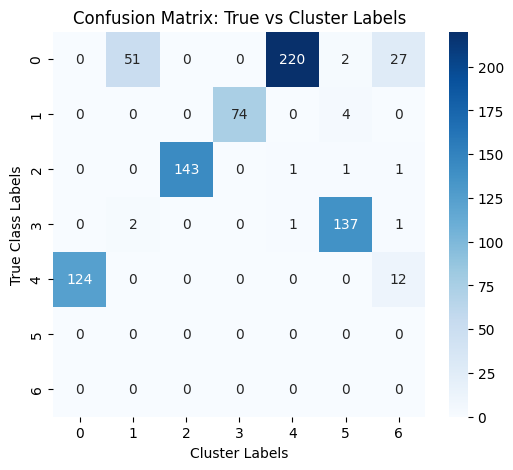

In [ ]:

# Step 9: Visualize Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Cluster Labels")
plt.ylabel("True Class Labels")
plt.title("Confusion Matrix: True vs Cluster Labels")
plt.show()


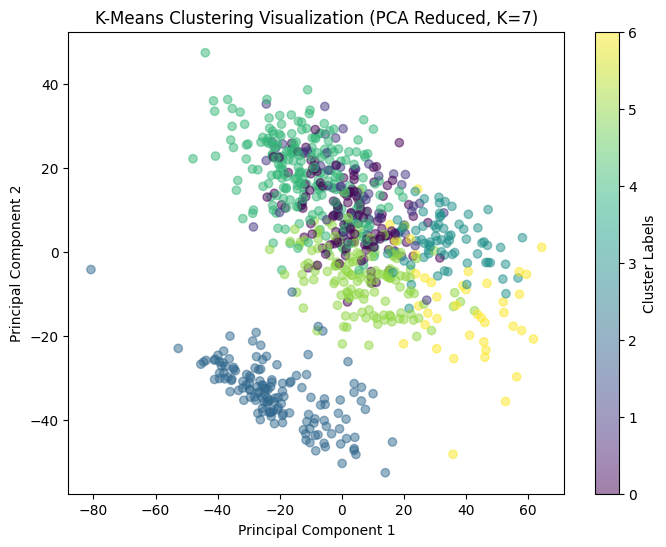

In [ ]:
# Step 10: Reduce Dimensions to 2D for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter Plot of Clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label="Cluster Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering Visualization (PCA Reduced, K={optimal_k})")
plt.show()

# **Agglomerative Clustering**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from google.colab import drive

In [ ]:
# Step 1: Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 2: Load the Excel File from Google Drive
file_path = "/content/drive/MyDrive/gene_expression_data.xls"  # Update with actual path

# Read first sheet (16,000 features)
df1 = pd.read_excel('/content/drive/MyDrive/project_data/split_data (1).xlsx', sheet_name=1)

# Read second sheet (4,000 features + class labels)
df2 = pd.read_excel('/content/drive/MyDrive/project_data/split_data (1).xlsx', sheet_name=2)

# Extract class labels from the last column of the second sheet
y = df2.iloc[:, -1].values  # Assuming the last column contains class labels

# Remove class labels column from df2 (keeping only features)
df2 = df2.iloc[:, :-1]

# Merge both feature sets
X = pd.concat([df1, df2], axis=1).values  # Convert to NumPy array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Step 3: Encode Class Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert class labels to numbers (0 to 4)

In [ ]:

# Step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Step 5: Perform Hierarchical Clustering (Agglomerative Clustering)
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = agg_clustering.fit_predict(X_scaled)


In [ ]:
# Step 6: Evaluate Clustering Performance
ari = adjusted_rand_score(y_encoded, cluster_labels)
nmi = normalized_mutual_info_score(y_encoded, cluster_labels)

# Compute Confusion Matrix
cm = confusion_matrix(y_encoded, cluster_labels)

# Print Evaluation Metrics
print("\nClustering Evaluation Metrics:")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")



Clustering Evaluation Metrics:
Adjusted Rand Index (ARI): 0.7801
Normalized Mutual Information (NMI): 0.8467


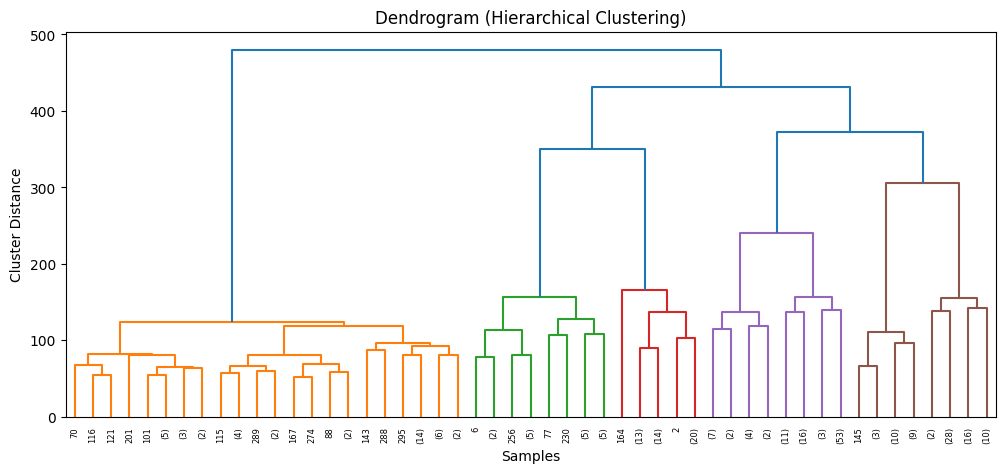

In [ ]:
# Step 7: Plot Dendrogram for Hierarchical Clustering
plt.figure(figsize=(12, 5))
linkage_matrix = linkage(X_scaled[:300], method='ward')  # Using only 300 samples for visualization
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Cluster Distance")
plt.show()


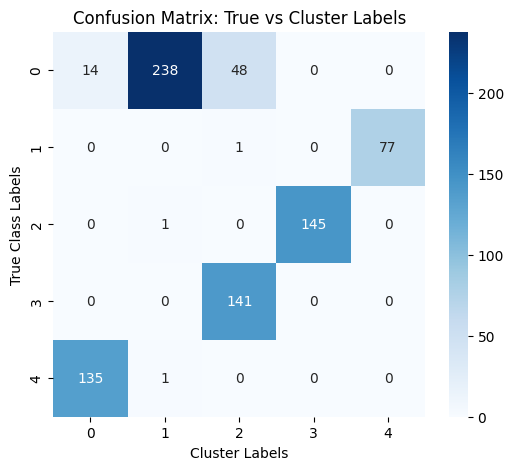

In [ ]:
# Step 8: Visualize Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Cluster Labels")
plt.ylabel("True Class Labels")
plt.title("Confusion Matrix: True vs Cluster Labels")
plt.show()


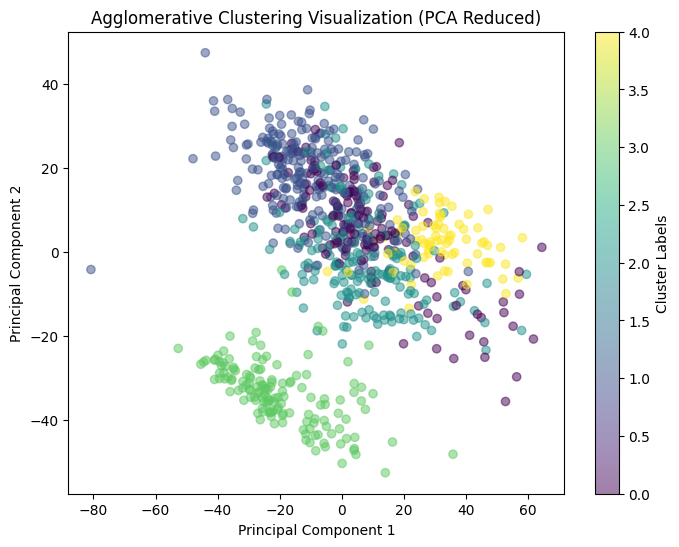

In [ ]:
# Step 9: Reduce Dimensions to 2D for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter Plot of Clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label="Cluster Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering Visualization (PCA Reduced)")
plt.show()